In [2]:
import warnings
import pandas as pd
import os
import pickle as pk
import tqdm
import matplotlib.pyplot as plt
import numpy as np

import placetmachine as pl

warnings.simplefilter(action='ignore', category=FutureWarning)

def gather_data2(folder, supress_output = False):
    data = []
    _start, _end = 1489, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [2]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [63]:
y3_summary_dict = {
    'iteration': [],
    'n_features': [],
    'score': [],
    'weights': [],
    'features': [],
    'total_loss': [], 
    'zero_loss': [], 
    'orbit_loss': [],
    'exit_orbit_loss': []
}

for i in tqdm.tqdm(range(11)):
    FOLDER = f"data/learning_storage/orbit_supression_2/Y3_sfs1_it{i}"

    tmp = gather_data3(FOLDER, True)
    tmp_sorted = tmp.sort_values(by = ['total_loss'])
    
    y3_summary_dict['iteration'].append(i)
    y3_summary_dict['n_features'].append(len(tmp_sorted.features_ids.values[0]))
    y3_summary_dict['score'].append(tmp_sorted.score.values[0])
    y3_summary_dict['weights'].append(tmp_sorted.weights.values[0])
    y3_summary_dict['features'].append(tmp_sorted.features_ids.values[0])
    y3_summary_dict['total_loss'].append(tmp_sorted.total_loss.values[0]) 
    y3_summary_dict['zero_loss'].append(tmp_sorted.zero_loss.values[0])
    y3_summary_dict['orbit_loss'].append(tmp_sorted.orbit_loss.values[0])
    y3_summary_dict['exit_orbit_loss'].append(tmp_sorted.exit_orbit_loss.values[0])
    
#    print(tmp_sorted.features_ids.values[0])
#    print(tmp_sorted.weights.values[0].ravel())

y3_summary = pd.DataFrame(y3_summary_dict)

y3_summary['problem_loss'] = y3_summary.total_loss - y3_summary.orbit_loss - y3_summary.zero_loss - y3_summary.exit_orbit_loss

print(y3_summary)

100%|██████████| 11/11 [00:01<00:00,  7.32it/s]

    iteration  n_features     score  \
0           0           3  0.682116   
1           1           4  0.922973   
2           2           5  0.918045   
3           3           6  0.933501   
4           4           7  0.945494   
5           5           8  0.954044   
6           6           9  0.966096   
7           7          10  0.970607   
8           8          11  0.972050   
9           9          12  0.972447   
10         10          13  0.973565   

                                              weights  \
0            [[-1.0205163], [-1.031652], [0.8363049]]   
1   [[-1.0216423], [-1.012855], [1.975302], [1.177...   
2   [[-1.5787574], [-1.0071665], [1.9793859], [1.1...   
3   [[-11.380182], [-6.5079885], [1.9712301], [1.1...   
4   [[-2.575551], [-6.9624743], [1.9428179], [1.13...   
5   [[-2.117854], [-6.875943], [2.971248], [1.3411...   
6   [[-2.128683], [-7.8521943], [4.2807064], [2.97...   
7   [[-2.025712], [-7.866285], [3.660003], [1.0050...   
8   [[-2.3338728],

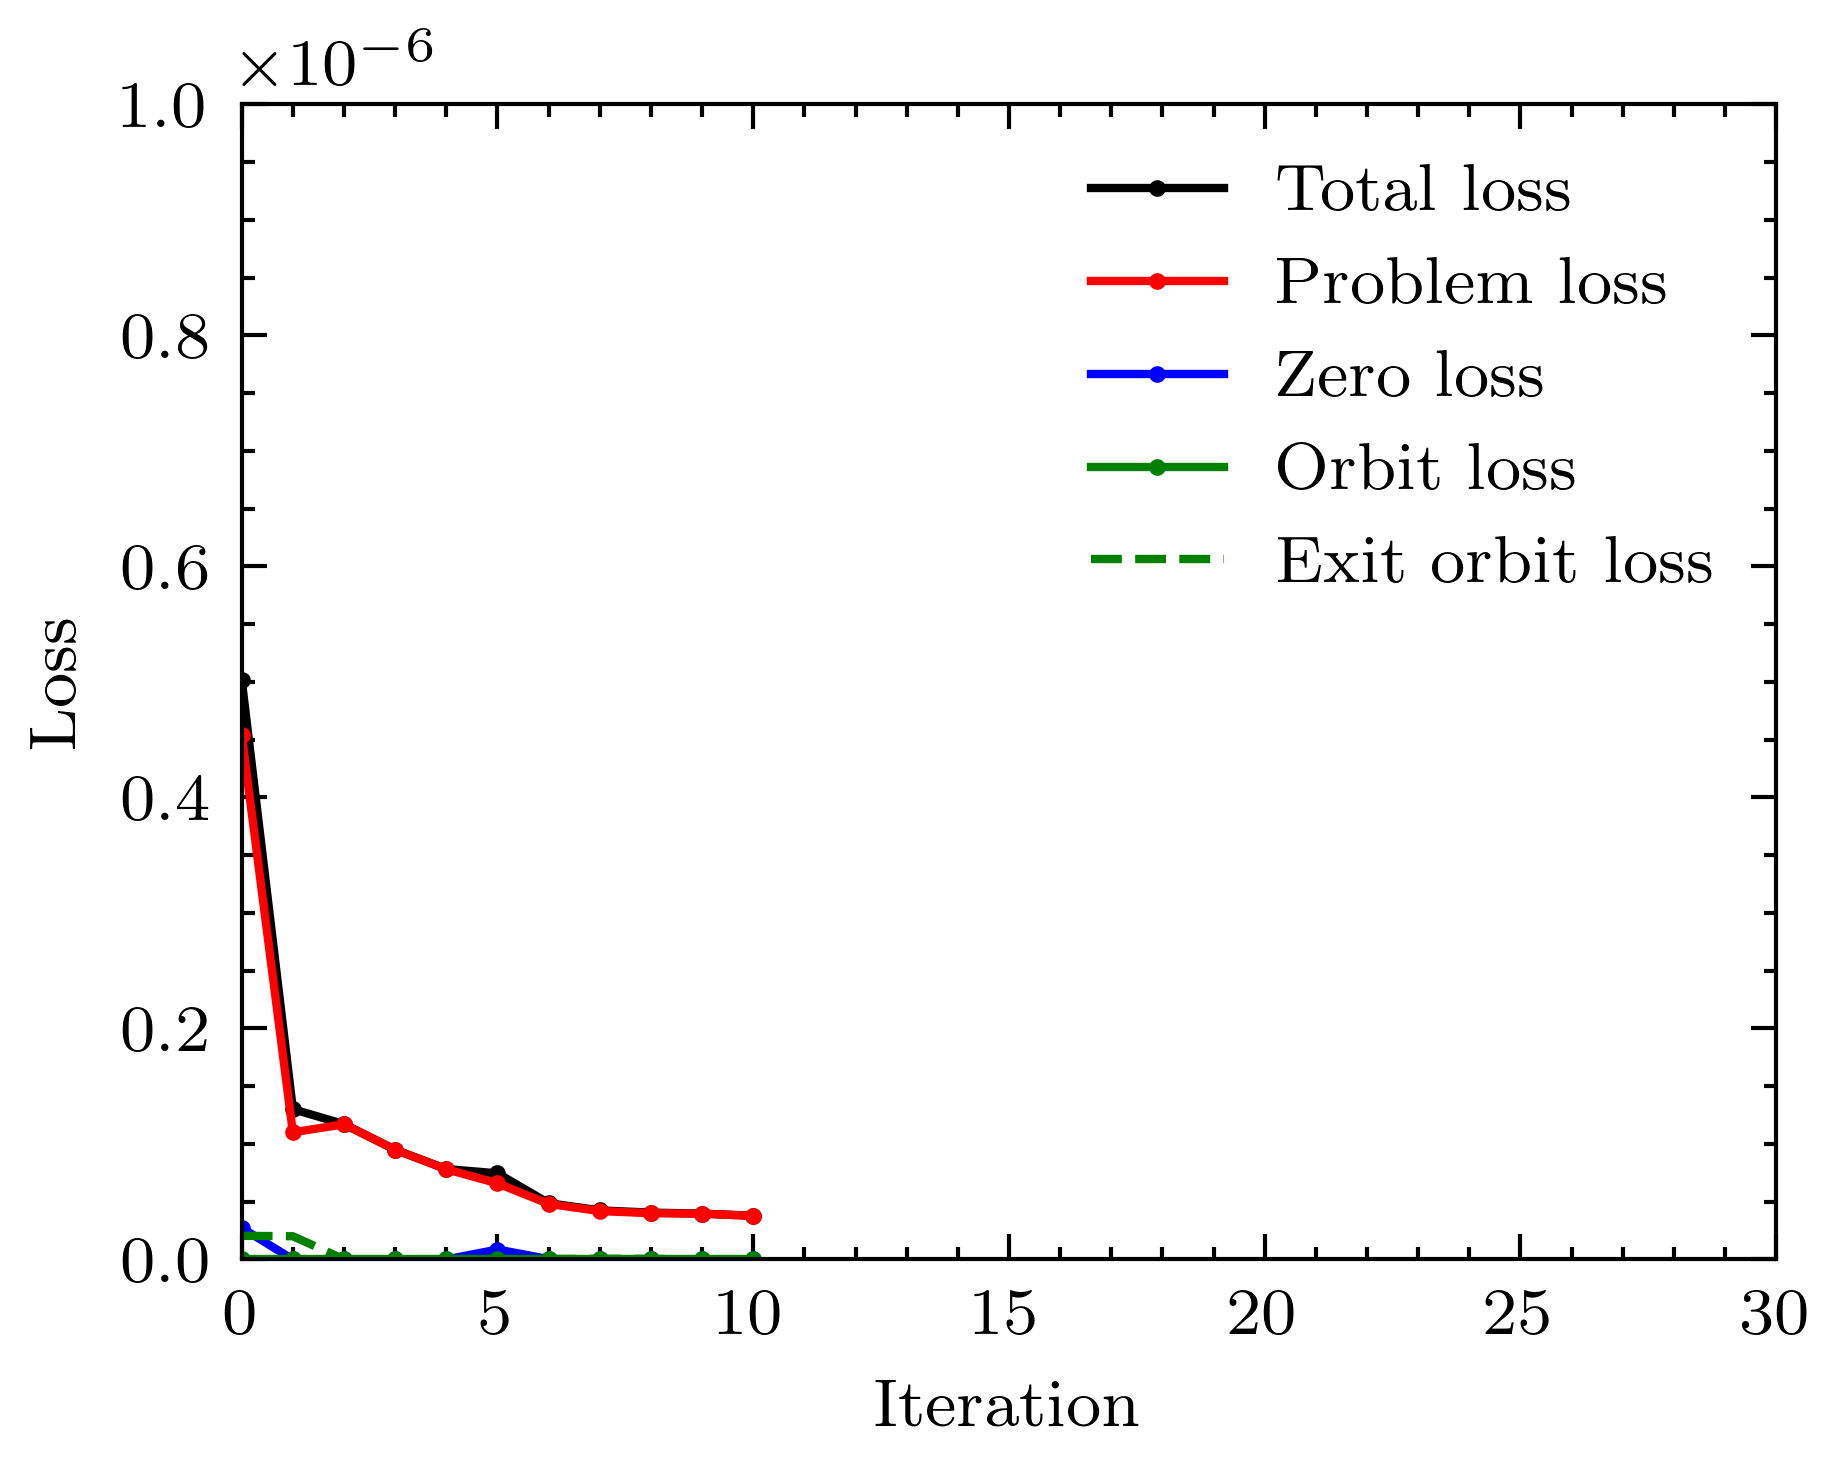

In [60]:
with plt.style.context(['science', 'ieee']):
    plt.plot(y3_summary.iteration, y3_summary.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")
    plt.plot(y3_summary.iteration, y3_summary.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y3_summary.iteration, y3_summary.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(y3_summary.iteration, y3_summary.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(y3_summary.iteration, y3_summary.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")


    plt.xlim(0, 30)
    plt.ylim(0.0, 1e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

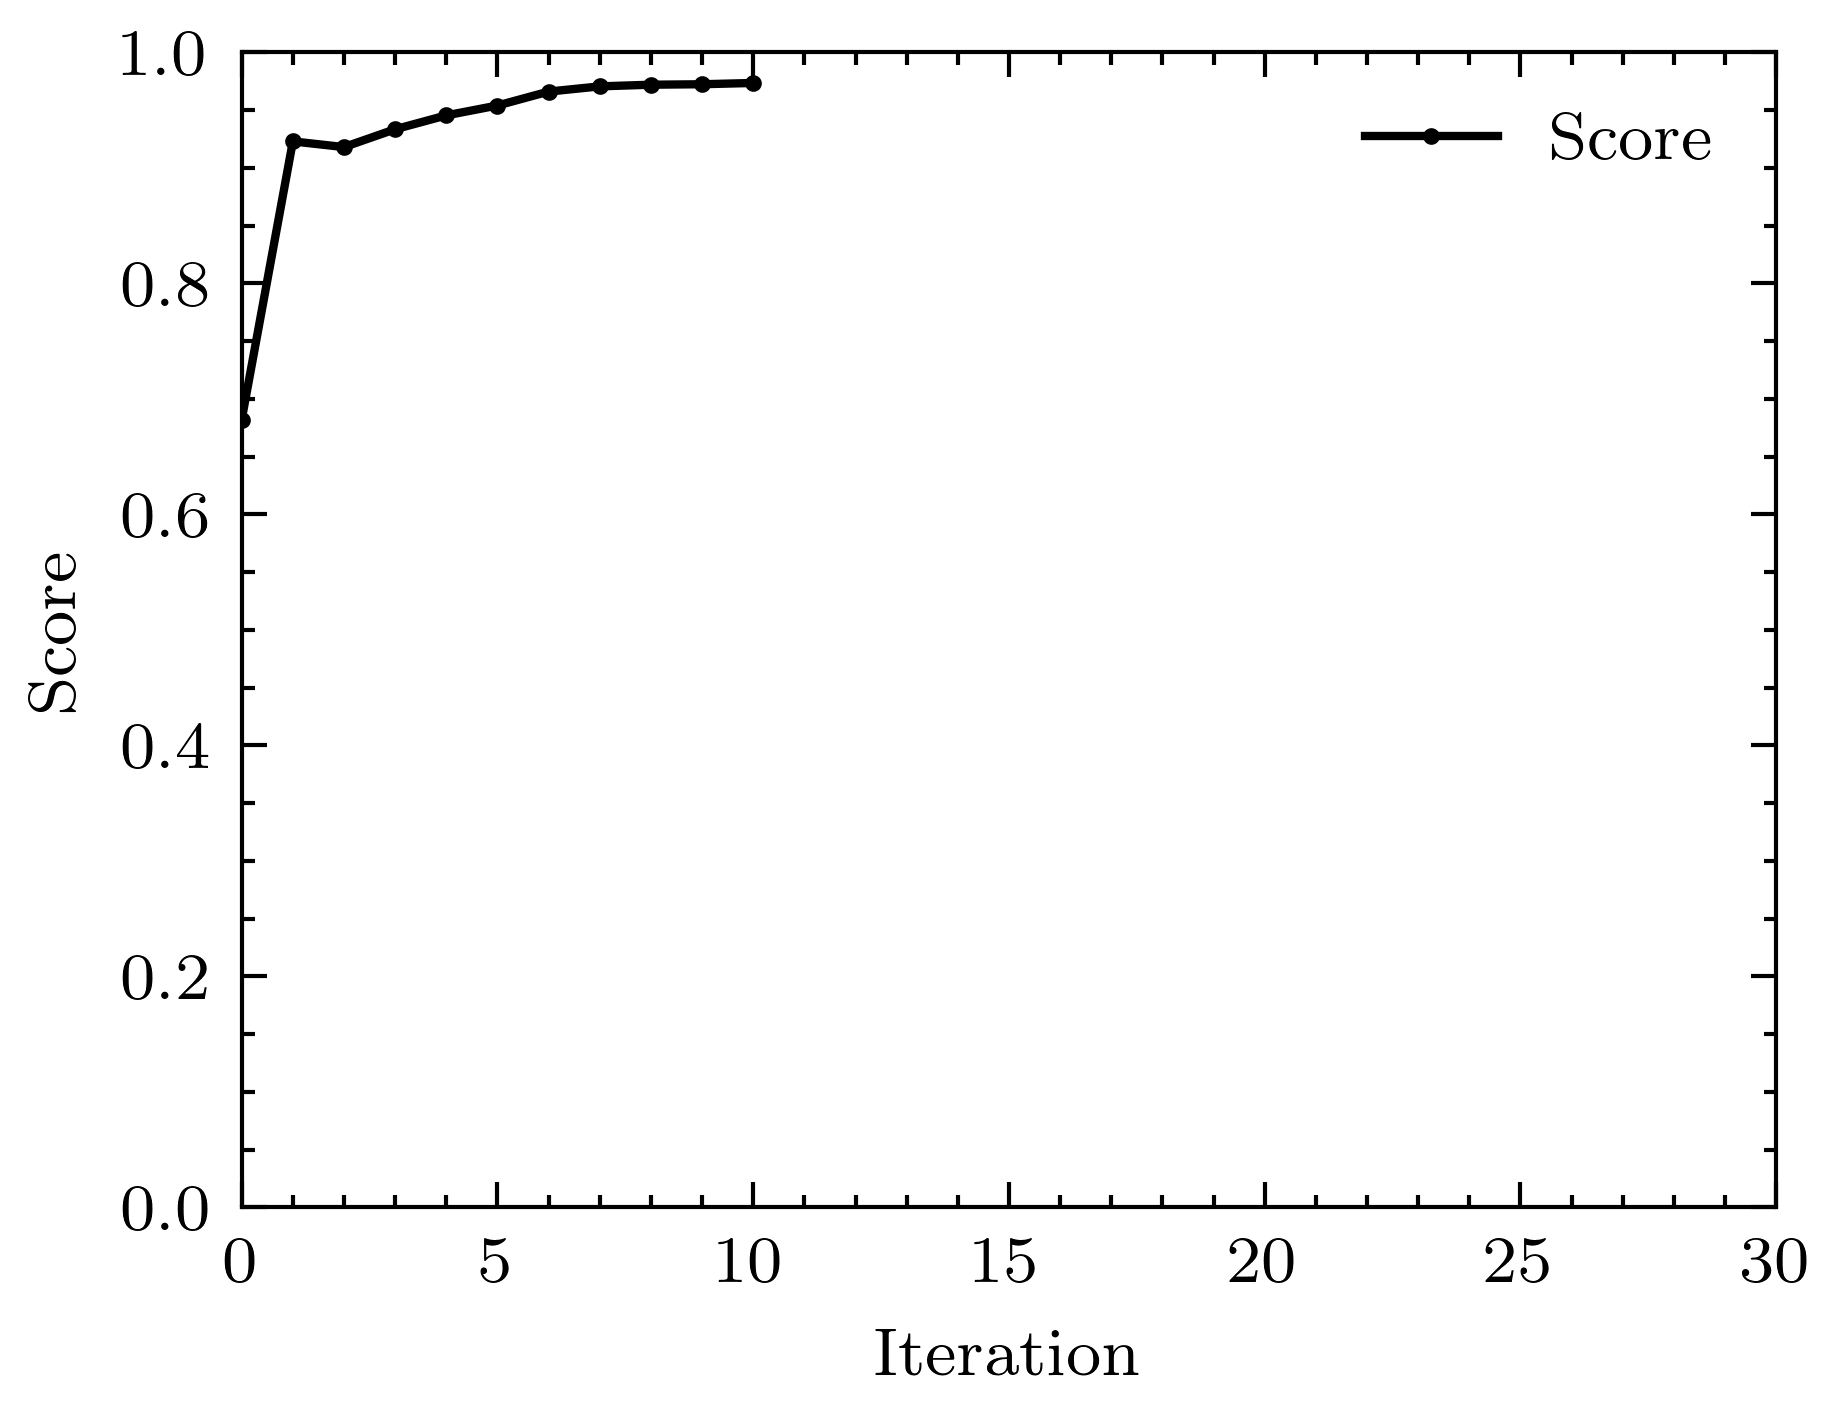

In [56]:
with plt.style.context(['science', 'ieee']):
#    plt.plot(y8_summary.n_features, y8_summary.total_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y3_summary.iteration, y3_summary.score, '-o', markersize = 1.0, label = "Score", color = "black")
    
    plt.xlim(0, 30)
    plt.ylim(0.0, 1.0)
    
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()

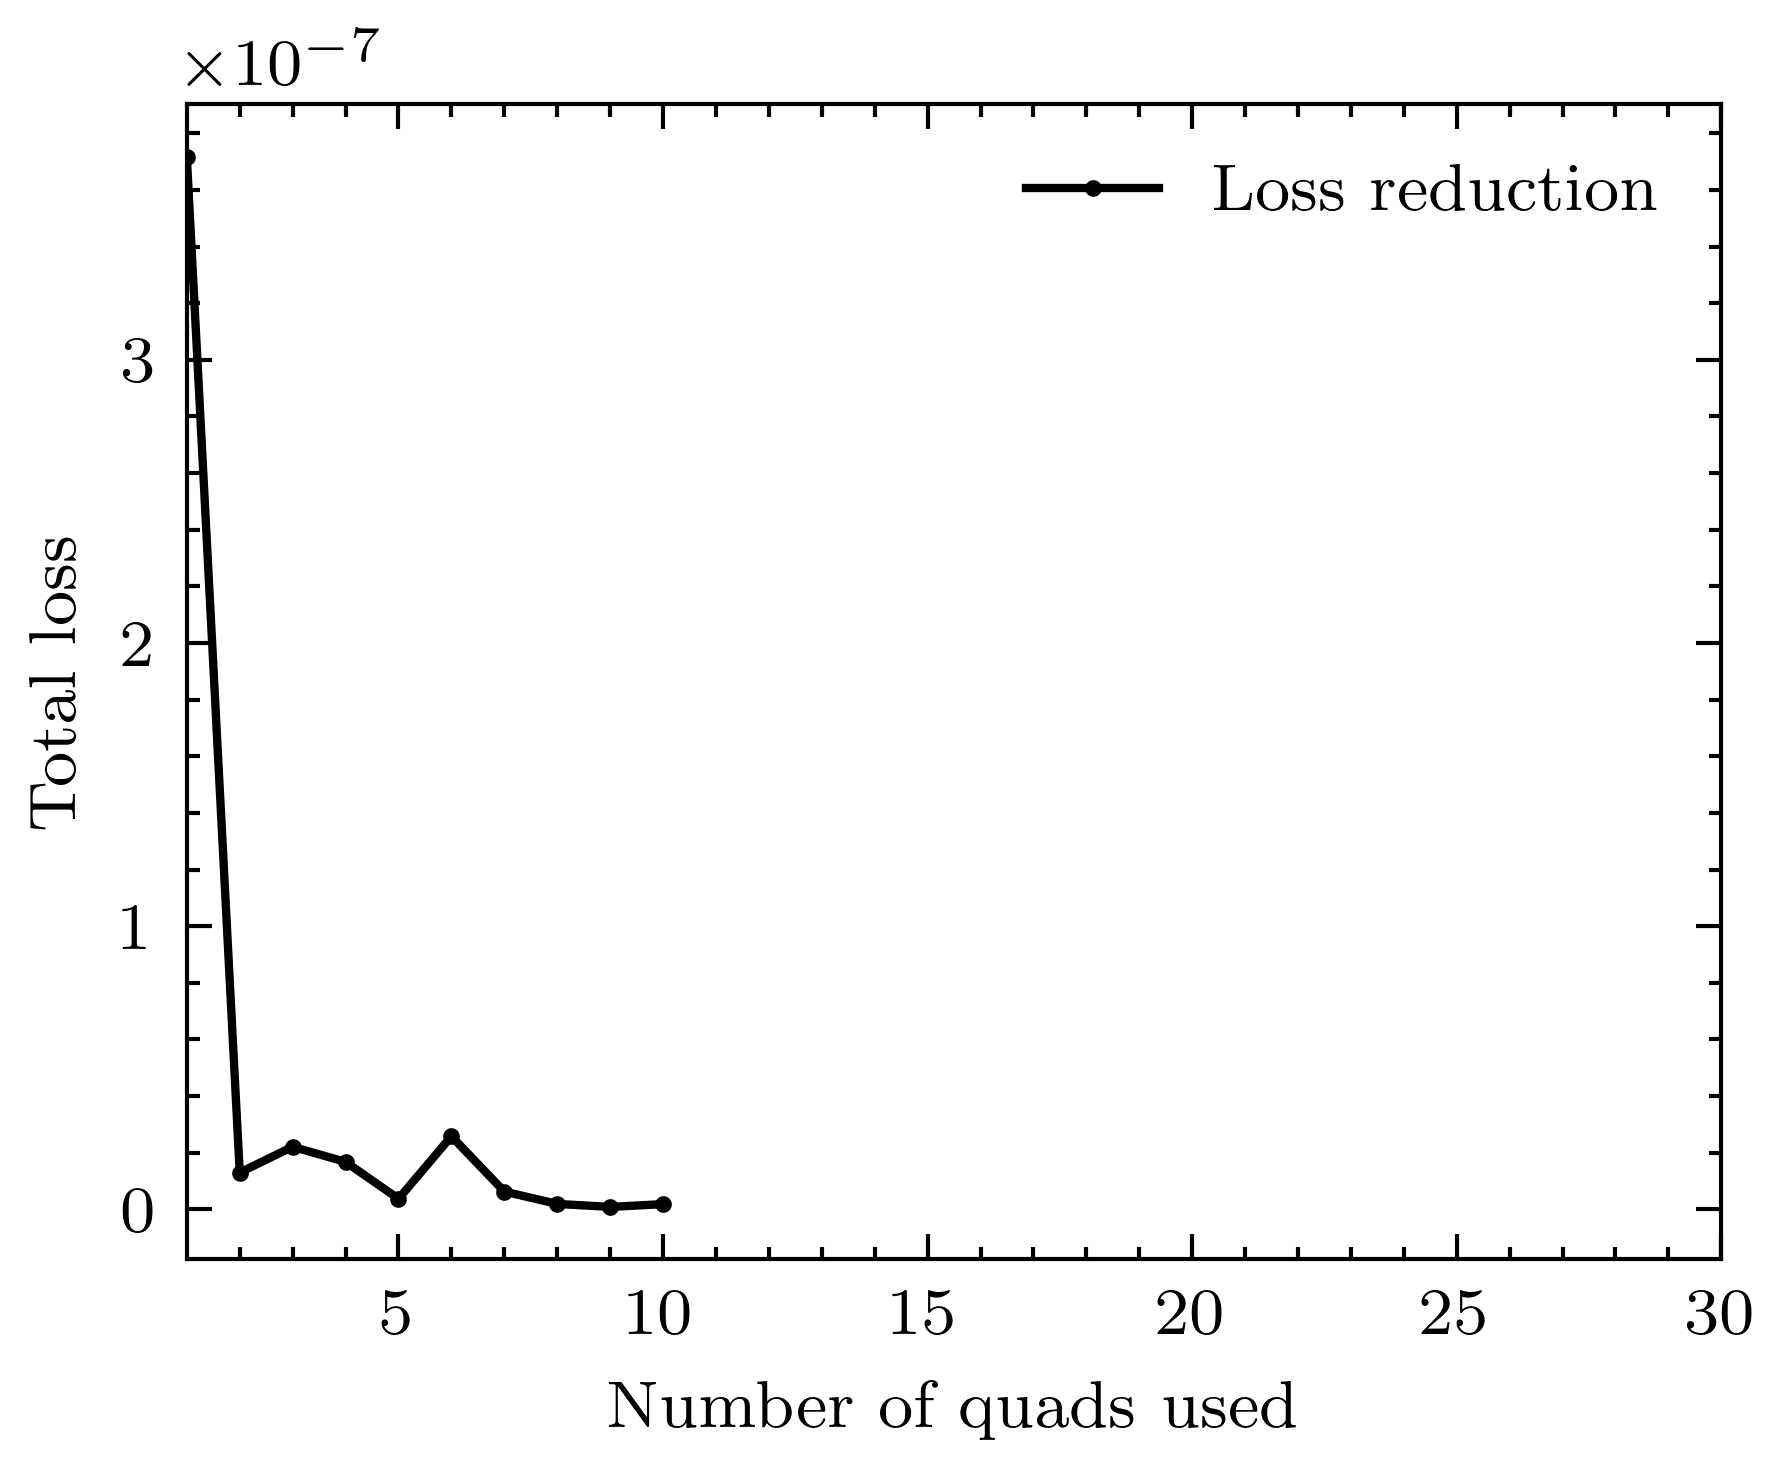

In [64]:
# plotting the dependance of the loss decrese as the function of the number of quads used

loss_reduction = []

for i in range(1, len(y3_summary.total_loss)):
    loss_reduction.append(y3_summary.total_loss[i - 1] - y3_summary.total_loss[i])
    
with plt.style.context(['science', 'ieee']):
    plt.plot(range(1, len(y3_summary.total_loss)), loss_reduction, '-o', markersize = 1.0, label = "Loss reduction", color = "black")

    plt.xlim(1, 30)
#    plt.ylim(0, 1.1e-7)
    
    plt.legend()
    plt.xlabel("Number of quads used")
    plt.ylabel("Total loss")
    plt.show()

In [3]:
import placetmachine as pl

In [4]:
# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [5]:
knobs_setup = {
    "Y3": f"data/learning_storage/orbit_supression_2/Y3_sfs1_it7",
}

In [6]:
# In the calculations I used girder and Quadrupoles
# The numbering of girders starts from 0 and after them there are 
# quadrupole. So I need to convert these quad ids into their
# indices in the beamline.

def construct_knobs():
    """
    """
#    print(f"Number of girders is {clic.beamline.get_girders_number()}")

    quads_transform = {}

    quad_index = 1489
    for quad in clic.beamline.extract(['Quadrupole']):
        quads_transform[quad_index] = quad.index
        quad_index += 1

    knobs = []

    for knob in knobs_setup:
        # reading the calculation file
        knob_candidate = gather_data2(knobs_setup[knob], True)

        # sorting the processed data 
        knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

        weights = knob_candidate_sorted.weights.values[0].ravel()
        features = knob_candidate_sorted.features_ids.values[0]
        print(list(weights), features)

        elements_list = []

        for quad_id in features:
            elements_list.append(clic.beamline[quads_transform[quad_id]])

        knobs.append(pl.Knob(elements_list, 'y', weights, name = knob))
    
    return knobs

In [7]:
knobs = construct_knobs()
for knob in knobs:
    print(knob)


[-2.025712, -7.866285, 3.660003, 1.0050365, 29.606256, 4.113457, 7.1035676, 1.1745324, -1.8962784, 1.0019736] [2061, 2062, 1495, 1521, 2059, 2039, 2060, 1491, 1543, 1532]
  name        type  girder           s    x          y   xp   yp
0       Quadrupole    1481  3466.28456  0.0  -2.025712  0.0  0.0
1       Quadrupole    1485  3475.65118  0.0  -7.866285  0.0  0.0
2       Quadrupole       7    14.25494  0.0   3.660003  0.0  0.0
3       Quadrupole      33    75.09468  0.0   1.005036  0.0  0.0
4       Quadrupole    1473  3447.55132  0.0  29.606256  0.0  0.0
5       Quadrupole    1393  3260.21892  0.0   4.113457  0.0  0.0
6       Quadrupole    1477  3456.91794  0.0   7.103568  0.0  0.0
7       Quadrupole       3     4.89498  0.0   1.174532  0.0  0.0
8       Quadrupole      55   126.57446  0.0  -1.896278  0.0  0.0
9       Quadrupole      44   100.83457  0.0   1.001974  0.0  0.0


In [70]:
print(clic.beamline)

Beamline(name = 'ml', structure = 
      name        type  girder           s    x   xp    y   yp
0           Quadrupole       1     0.21500  0.0  0.0  0.0  0.0
1                Drift       1     0.27500  0.0  0.0  0.0  0.0
2               Cavity       1     0.81833  0.0  0.0  0.0  0.0
3                Drift       1     0.85833  0.0  0.0  0.0  0.0
4               Cavity       1     1.40166  0.0  0.0  0.0  0.0
...    ...         ...     ...         ...  ...  ...  ...  ...
13524           Cavity    1488  3483.28447  0.0  0.0  0.0  0.0
13525            Drift    1488  3483.32447  0.0  0.0  0.0  0.0
13526           Cavity    1488  3483.86780  0.0  0.0  0.0  0.0
13527            Drift    1488  3483.88780  0.0  0.0  0.0  0.0
13528              Bpm    1489  3483.96780  0.0  0.0  0.0  0.0

[13529 rows x 8 columns])


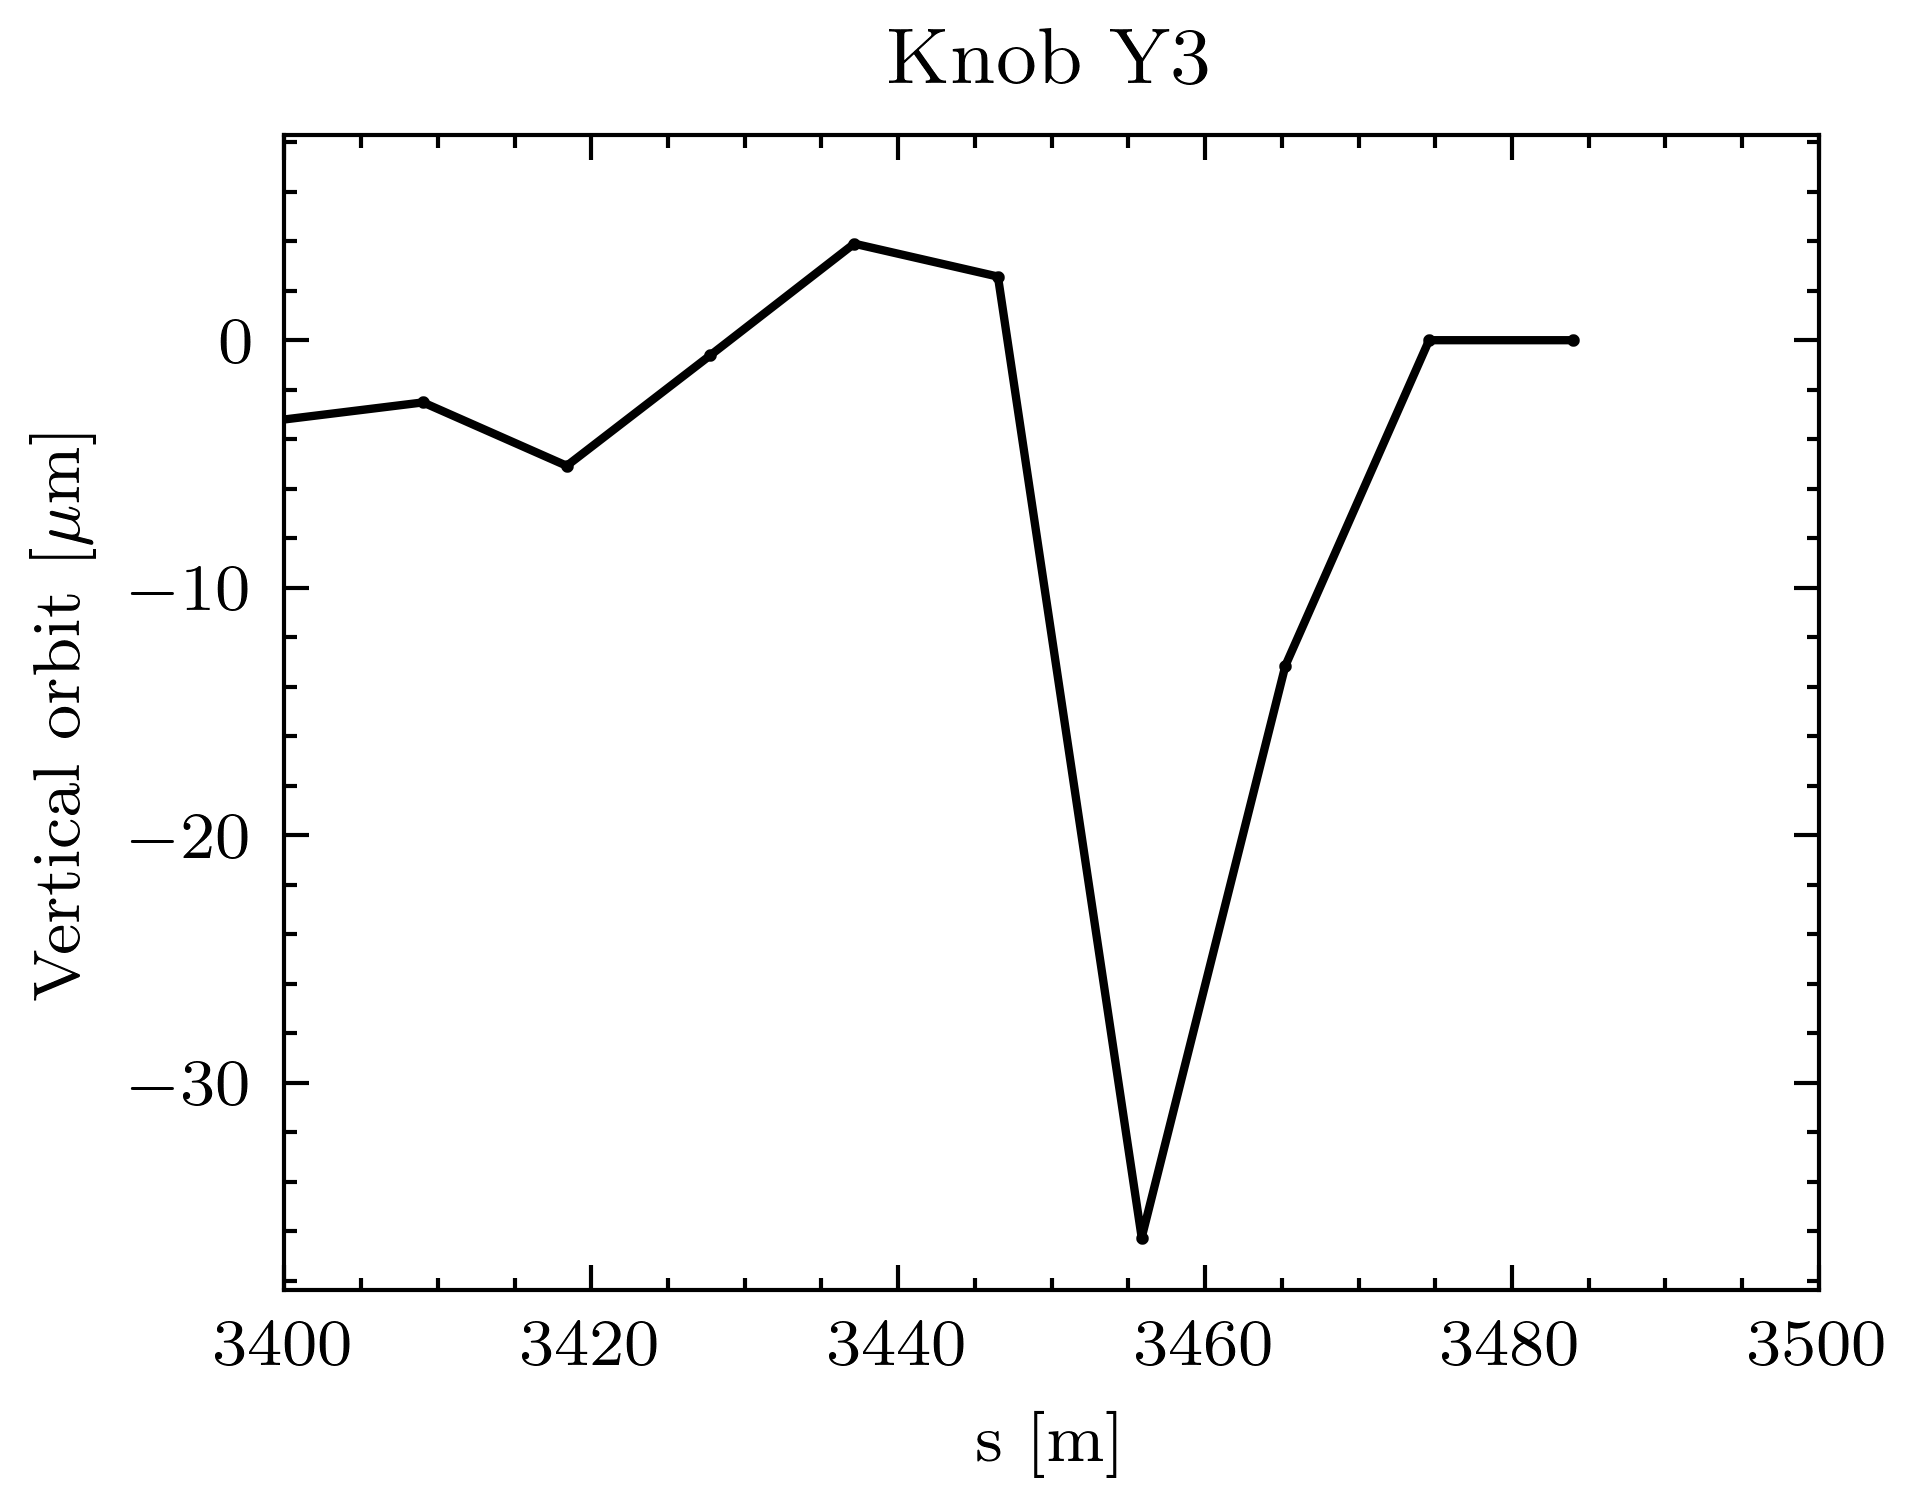

The last 2 BPMs orbit 6.65497 nm and 6.02264 nm


In [94]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y3")
    plt.plot(beam_orbit.s, beam_orbit.y, '-o', markersize = 0.5)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.xlim(3400, 3500)
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

print(f"The last 2 BPMs orbit {beam_orbit.y.values[-2] * 1e3} nm and {beam_orbit.y.values[-1] * 1e3} nm")

Lets check out the solution with smaller exit orbit loss

In [91]:
knobs_setup = {
    "Y3": f"data/learning_storage/orbit_supression_2/Y3_sfs1_it10",
}

knobs = construct_knobs()
for knob in knobs:
    print(knob)


   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1481  3466.28456  0.0  -1.843050  0.0  0.0
1        Quadrupole    1485  3475.65118  0.0  -8.012489  0.0  0.0
2        Quadrupole       7    14.25494  0.0   3.660011  0.0  0.0
3        Quadrupole      33    75.09468  0.0   1.000843  0.0  0.0
4        Quadrupole    1473  3447.55132  0.0  27.782095  0.0  0.0
5        Quadrupole    1393  3260.21892  0.0  26.244236  0.0  0.0
6        Quadrupole    1477  3456.91794  0.0   7.578228  0.0  0.0
7        Quadrupole       3     4.89498  0.0   1.191456  0.0  0.0
8        Quadrupole      55   126.57446  0.0  -1.911264  0.0  0.0
9        Quadrupole      44   100.83457  0.0   1.002961  0.0  0.0
10       Quadrupole    1209  2829.35440  0.0  -1.009868  0.0  0.0
11       Quadrupole    1409  3297.68540  0.0  23.005943  0.0  0.0
12       Quadrupole    1249  2923.02060  0.0   1.002427  0.0  0.0


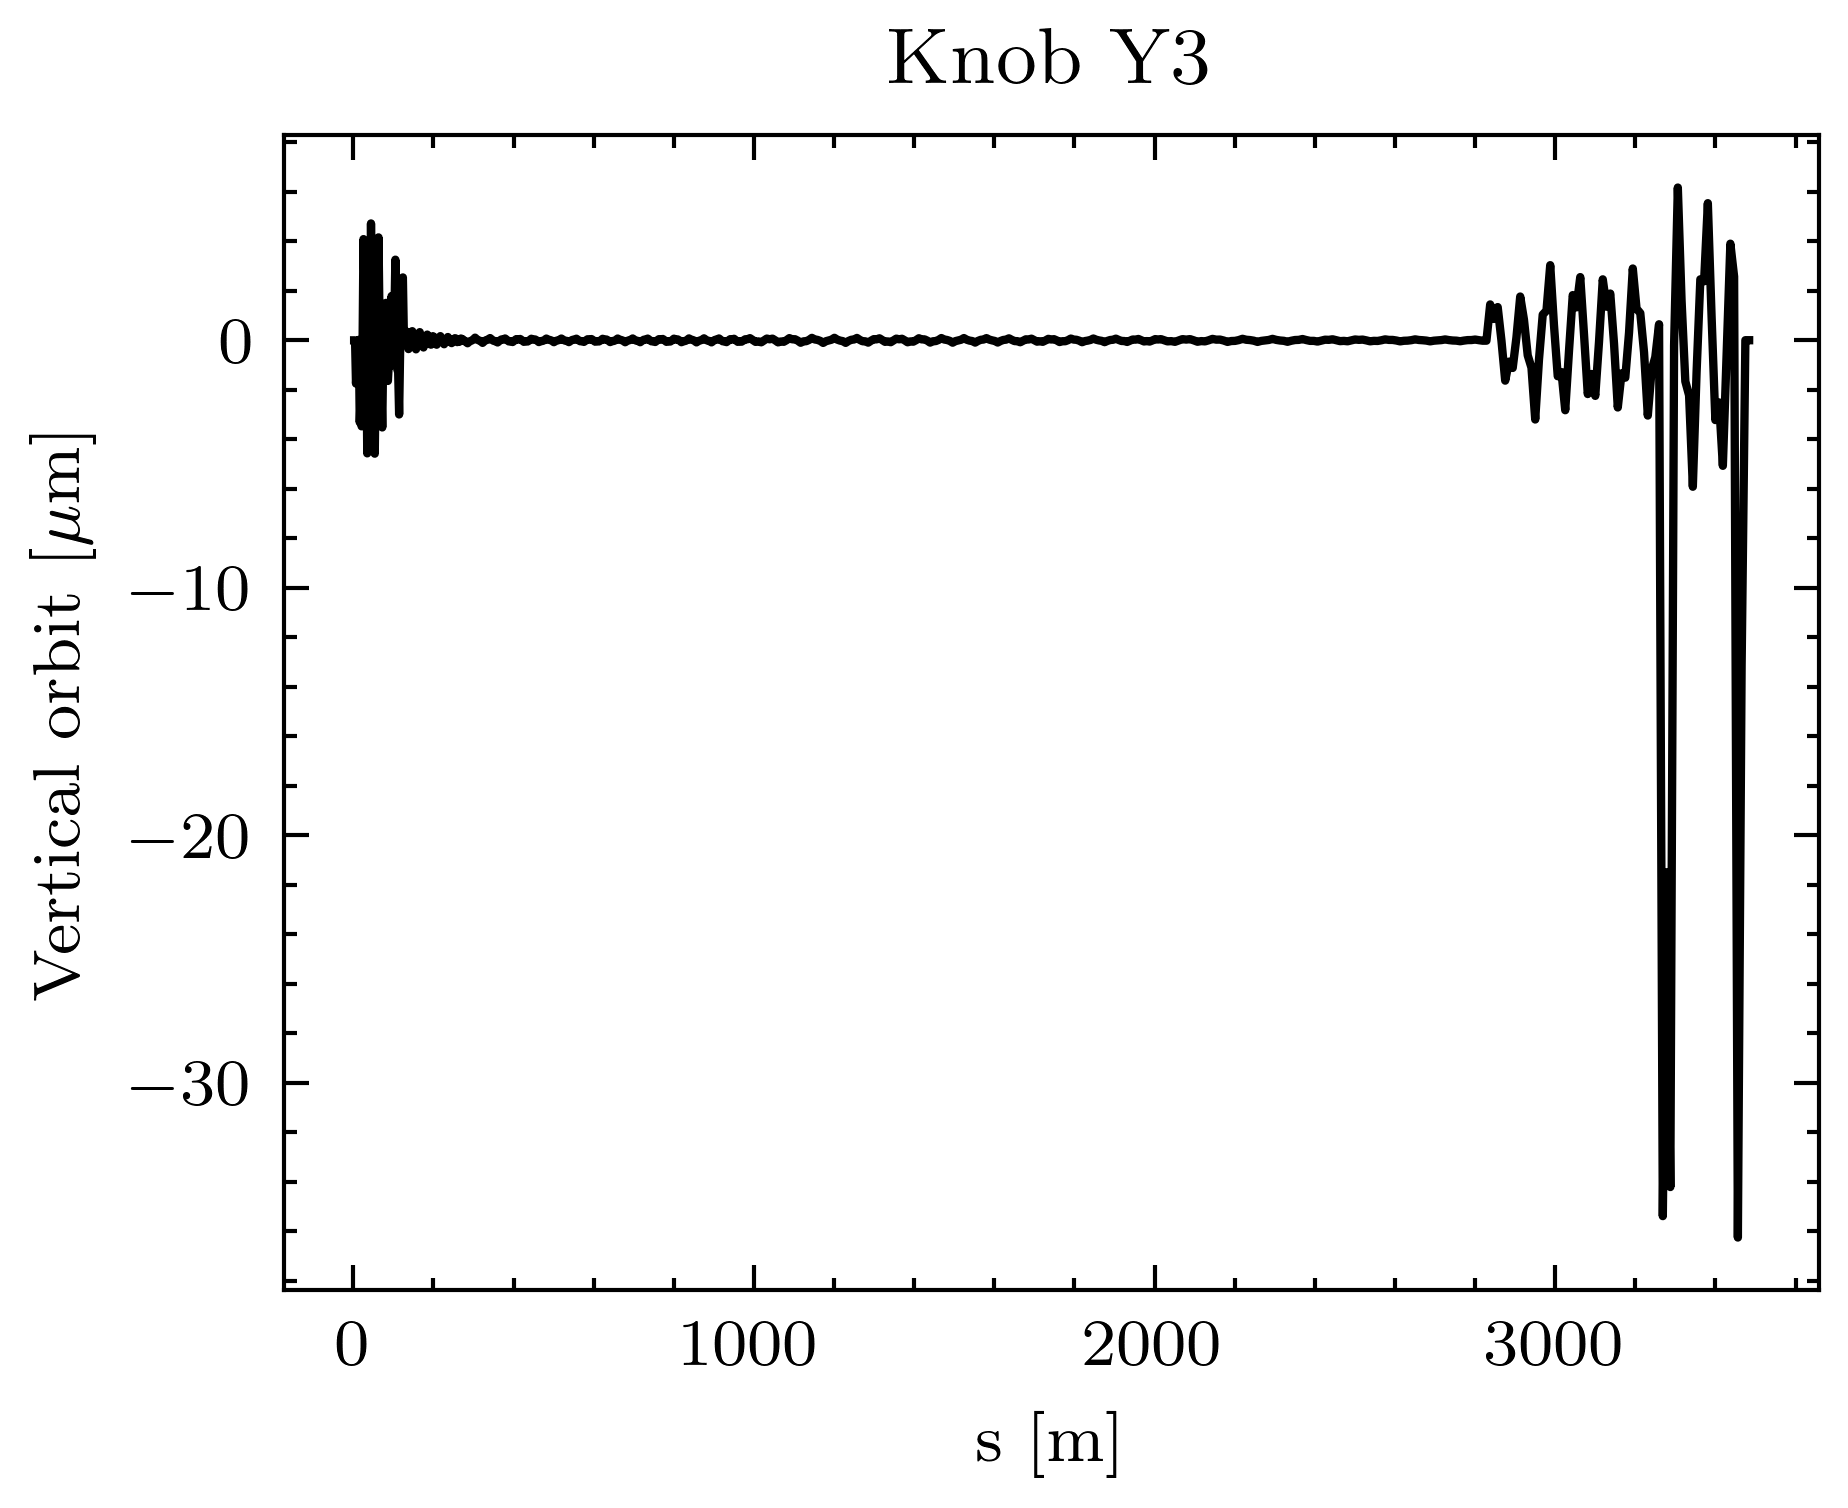

The last 2 BPMs orbit 6.65497 nm and 6.02264 nm


In [92]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y3")
    plt.plot(beam_orbit.s, beam_orbit.y, '-', markersize = 0.5)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
#    plt.xlim(3000,)
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

print(f"The last 2 BPMs orbit {beam_orbit.y.values[-2] * 1e3} nm and {beam_orbit.y.values[-1] * 1e3} nm")

I think the solution with 10 elements is pretty valid: 50 nm and 9 nm. There is an option to chose the better solution that gives 6 nm and 6 nm.

Trying out the same for the other knobs. Although, I am aware that it does not work for Y7 and Y8.